TREINAR MODELO ERA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [2]:
df = pd.read_csv('oceanographic and meteorological dataset.csv')
df.head(5)

,time,u10_era5,v10_era5,mwd_era5,mwp_era5,swh_era5,pp1d_era5,uo_cop,vo_cop,swh_cop,mwp_cop,mwd_cop,peak_period_cop
0,2025-01-01 00:00:00,-6.306534,14.981308,172.33765,8.959626,4.751488,10.330421,0.019531,0.160156,5.10,7.56,175.07,10.85
1,2025-01-01 01:00:00,-4.723419,14.342773,171.36377,8.907424,4.758851,10.286964,0.026367,0.164062,NaN,NaN,NaN,NaN
2,2025-01-01 02:00:00,-3.978439,12.770416,171.11426,8.913869,4.665862,10.272316,0.038086,0.162109,NaN,NaN,NaN,NaN
3,2025-01-01 03:00:00,-3.164124,15.130005,171.06311,8.911307,4.565788,10.260597,0.053711,0.155273,5.03,7.60,174.16,10.71
4,2025-01-01 04:00:00,-3.343689,12.074799,171.16702,8.862277,4.541395,10.223000,0.070312,0.143555,NaN,NaN,NaN,NaN


In [3]:
df['time'] = pd.to_datetime(df['time']) 

df['hour_sin'] = np.sin(2 * np.pi * df['time'].dt.hour / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['time'].dt.hour / 24)
df['month_sin'] = np.sin(2 * np.pi * df['time'].dt.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df['time'].dt.month / 12)

colunas_para_remover = [
    'uo_cop', 'vo_cop', 'swh_cop', 'mwd_cop', 
    'mwp_cop', 'peak_period_cop', 'time'
]
df = df.drop(columns=colunas_para_remover, errors='ignore')

In [4]:
df.describe()

,u10_era5,v10_era5,mwd_era5,mwp_era5,swh_era5,pp1d_era5,hour_sin,hour_cos,month_sin,month_cos
count,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7.993000e+03,7.993000e+03,7.993000e+03,7.993000e+03
mean,2.188604,-0.618673,254.533087,8.491293,2.289455,10.429202,-1.711241e-17,1.251095e-04,-4.458706e-03,-9.817380e-02
std,5.049941,5.654880,101.285307,1.508553,1.293055,2.219554,7.071068e-01,7.071952e-01,7.382794e-01,6.673901e-01
min,-10.217163,-17.162354,0.005922,5.044391,0.706308,4.360695,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,-1.410156,-4.420624,247.110920,7.368544,1.306941,8.810890,-7.071068e-01,-7.071068e-01,-8.660254e-01,-8.660254e-01
50%,2.046631,-1.186233,291.861820,8.303400,1.870715,10.276711,0.000000e+00,6.123234e-17,1.224647e-16,-1.836970e-16
75%,5.630310,3.352921,320.586180,9.305229,2.910931,11.903175,7.071068e-01,7.071068e-01,8.660254e-01,5.000000e-01
max,21.640991,17.548920,359.915250,14.556703,8.823090,19.234710,1.000000e+00,1.000000e+00,1.000000e+00,8.660254e-01


<Axes: >

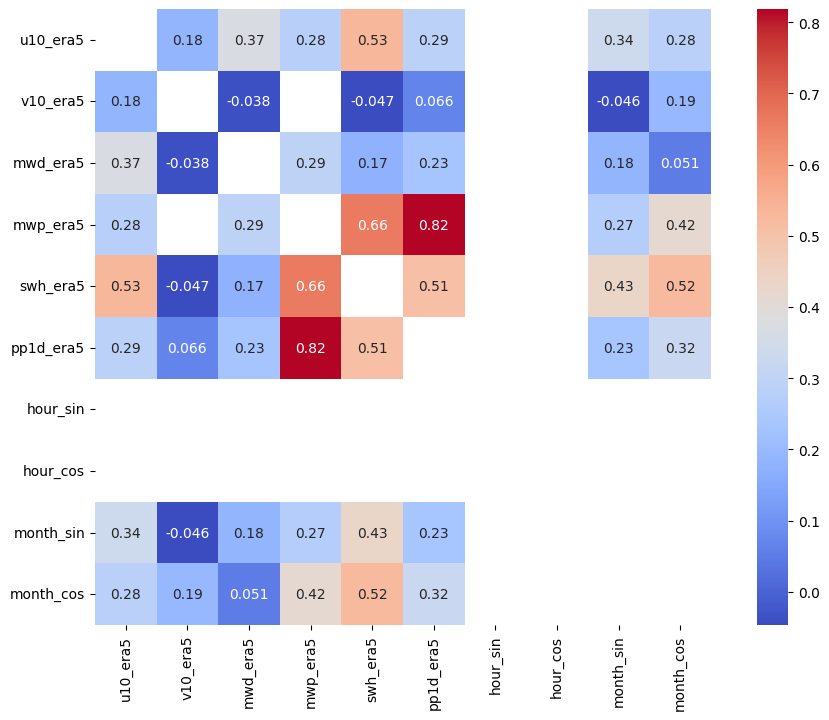

In [5]:
from scipy.stats import pearsonr

## Calculate the pairwise correaltions
df_corrs = df.corr(numeric_only=True)

## Calculate the p-values between the columns of the dataframe
pvals = df.corr(numeric_only=True, method=lambda x, y: pearsonr(x, y)[1])

## Create a mask, specifying the statistical significance
ptg = 0.1 / 100
mask = pvals > ptg

## Plot the graph
plt.subplots(figsize=(12, 8))
sns.heatmap(df_corrs, mask=mask, square=True, annot=True, cmap="coolwarm")

In [6]:
# Vamos prever as 3 que viste que estão ligadas + a direção (sin/cos)
colunas_alvo = ['swh_era5', 'mwp_era5', 'pp1d_era5','mwd_era5']
y_multi = df[colunas_alvo].values

X = df.drop(columns=['swh_era5', 'mwp_era5', 'pp1d_era5','mwd_era5'])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y_multi, train_size=0.7, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.66, random_state=42, shuffle=False)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor_X = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), slice(0, X.shape[1]))
    ], remainder='passthrough'
)
X_train_scaled = preprocessor_X.fit_transform(X_train)
X_val_scaled = preprocessor_X.transform(X_val)
X_test_scaled = preprocessor_X.transform(X_test)

scaler_y_multi = StandardScaler()


y_train_scaled = scaler_y_multi.fit_transform(y_train)
y_val_scaled = scaler_y_multi.transform(y_val)
y_test_scaled = scaler_y_multi.transform(y_test)

# Nota: O X_train_scaled deve ser feito com o teu preprocessor_X como antes
X_train_scaled = preprocessor_X.fit_transform(X_train)
X_val_scaled = preprocessor_X.transform(X_val)
X_test_scaled = preprocessor_X.transform(X_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

n_features = X_train_scaled.shape[1]

model_multi = Sequential([
    Input(shape=(n_features,)),
    Dense(64, activation='relu'), # 64 neurónios para lidar com a complexidade de 4 alvos
    Dense(64, activation='relu'),
    Dense(4, activation='linear') # <--- 4 neurónios para [swh, mwp, sin, cos]
])

model_multi.compile(optimizer=Adam(learning_rate=1e-5), loss='mse')

history_multi = model_multi.fit(
    X_train_scaled, y_train_scaled,
    epochs=400,
    batch_size=32,
    verbose=1,
    validation_data=(X_val_scaled, y_val_scaled)
)

Epoch 1/400
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9753 - val_loss: 0.8893
Epoch 2/400
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9468 - val_loss: 0.8773
Epoch 3/400
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9202 - val_loss: 0.8677
Epoch 4/400
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8954 - val_loss: 0.8602
Epoch 5/400
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8720 - val_loss: 0.8531
Epoch 6/400
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8500 - val_loss: 0.8475
Epoch 7/400
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8294 - val_loss: 0.8428
Epoch 8/400
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8101 - val_loss: 0.8390
Epoch 9/400
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7920 - val_loss: 0.8357
Epoch 10/400
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7752 - val_loss: 0.8333
Epoch 11/400
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7595 - val_loss: 0.8316
Epoch 12/400
175/175 ━━━━━━━━━━━━━━━━━━━━

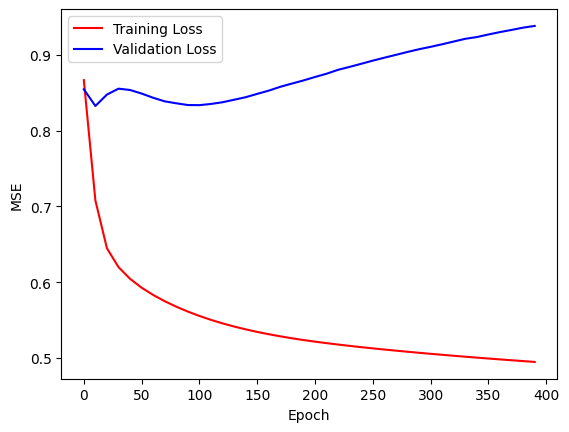

In [11]:
losses = pd.DataFrame(data={
    'epoch': [(i // 10) * 10 for i in history_multi.epoch],
    'loss': history_multi.history['loss'],
    'val_loss': history_multi.history['val_loss']
})
losses = losses.groupby(by='epoch').mean().reset_index()

fig, ax = plt.subplots()
ax.plot(losses.epoch, losses.loss, 'r-', label='Training Loss')
ax.plot(losses.epoch, losses.val_loss, 'b-', label='Validation Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE')
ax.legend()

In [12]:
# 1. Gerar as previsões (isto cria a variável que faltava)
y_pred_scaled = model_multi.predict(X_test_scaled)

# 2. Inverter a escala para ter valores reais (Metros, Segundos, etc.)
# Nota: Usa o nome EXATO do teu scaler de saída (scaler_y_multi)
y_pred_real = scaler_y_multi.inverse_transform(y_pred_scaled)

# 3. Garantir que o y_test também está na escala real para comparar
# Se o teu y_test veio do split original, ele pode estar escalado ou não.
# Para ter a certeza, vamos inverter também:
y_test_real = scaler_y_multi.inverse_transform(y_test_scaled)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


NameError: name 'model' is not defined

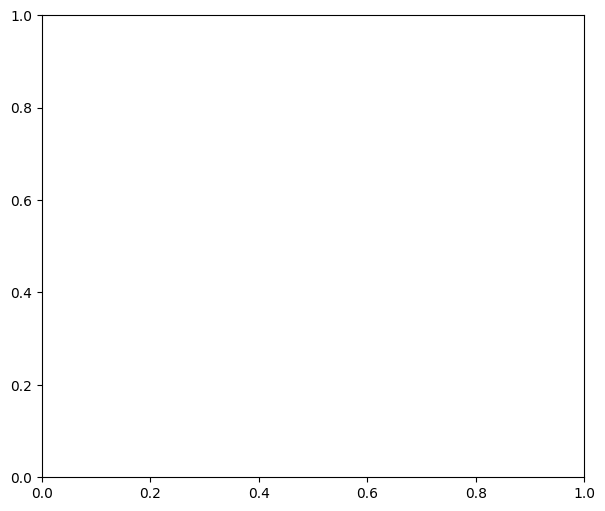

In [14]:
fig, ax = plt.subplots(figsize=(7, 6))
y_pred_scaled = model.predict(X_test_scaled, verbose=0)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
ax.scatter(y_test, y_pred, color='tab:blue', alpha=0.7)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('Actual swh')
ax.set_ylabel('Predicted swh')

test_loss = MeanSquaredError()(y_test_scaled, y_pred_scaled).numpy()
ax.set_title(f'MSE on Test Set: {test_loss:.4f}')

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Para a Altura (Coluna 0)
mae_swh = mean_absolute_error(y_test_real[:, 0], y_pred_real[:, 0])
r2_swh = r2_score(y_test_real[:, 0], y_pred_real[:, 0])

print(f"Erro Médio (SWH): {mae_swh:.2f} metros")
print(f"Precisão (R²): {r2_swh:.4f}")